In [2]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

# A* algorithm for multiple goals
def a_star_multiple_goals(graph, start, goals, heuristic):
    open_list = []
    heapq.heappush(open_list, (heuristic[start], 0, start, [start]))
    closed_set = set()
    best_path = None
    best_cost = float('inf')

    while open_list:
        f, g, current, path = heapq.heappop(open_list)

        if current in goals and g < best_cost:
            best_path = path
            best_cost = g
            continue
        if current in closed_set:
            continue
        closed_set.add(current)

        for neighbor, cost in graph.get(current, []):
            if neighbor not in closed_set:
                new_g = g + cost
                new_f = new_g + heuristic.get(neighbor, float('inf'))
                heapq.heappush(open_list, (new_f, new_g, neighbor, path + [neighbor]))

    return best_path


In [ ]:
# Graph with weights and heuristic values 
graph = {
    'S': [('A',5), ('B',9), ('D',6)],
    'A': [('G1',9), ('B',3)],
    'B': [('A',2), ('C',1)],
    'C': [('S',6), ('G2',5), ('F',7)],
    'D': [('S',1), ('E',2), ('C',2)],
    'E': [('G3',7)],
    'F': [('G3',8)],
    'G1': [],
    'G2': [],
    'G3': []
}


heuristic = {
    'A': 7,
    'B': 3,
    'C': 4,
    'D': 6,
    'E': 5,
    'F': 6,
    'S': 5,
    'G1': 0,
    'G2': 0,
    'G3': 0
}

start_node = 'S'
goal_nodes = {'G1', 'G2', 'G3' }



In [ ]:
# Find shortest path using A* algorithm 
shortest_path = a_star_multiple_goals(graph, start_node, goal_nodes, heuristic)
print("Shortest path from", start_node, "to one of the goals", goal_nodes, "is:", shortest_path)


Shortest path from S to one of the goals {'G1', 'G3', 'G2'} is: ['S', 'D', 'C', 'G2']


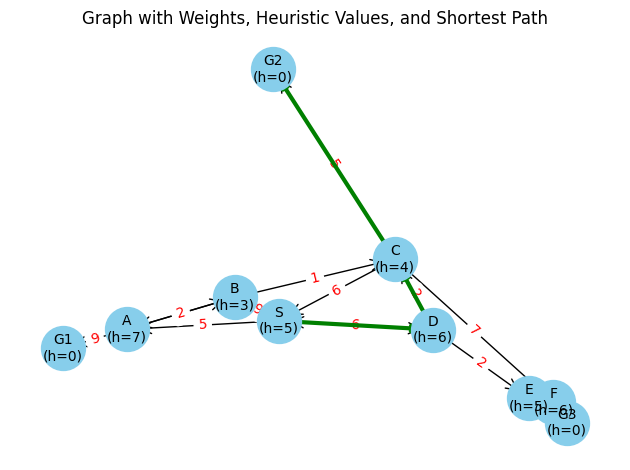

In [21]:
# Visualize graph
G = nx.DiGraph()
for node, h in heuristic.items():
    G.add_node(node, heuristic=h)
for u, neighbors in graph.items():
    for v, w in neighbors:
        G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)
node_labels = {node: f"{node}\n(h={data['heuristic']})" for node, data in G.nodes(data=True)}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Highlight shortest path
if shortest_path:
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
plt.title("Graph with Weights, Heuristic Values, and Shortest Path")
plt.axis('off')
plt.tight_layout()
plt.show()
